In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import import_ipynb
from lab_1_practical_session import batch_gradient 
from lab_3_practical_session import evaluate_the_model , all_plots

## generating the data

In [2]:
x_points = np.linspace(0,20).reshape(-1,1)
a=-1
b=2
y_points = a*x_points + b
_ = np.reshape(y_points,(-1,1))
x_points.shape

(50, 1)

## plotting the data

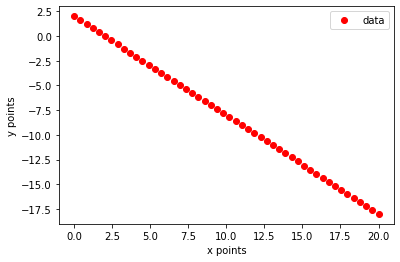

In [3]:
_ = plt.plot(x_points, y_points,'ro',label = 'data')
#_ = plt.scatter(x_points, y_points)
_ = plt.xlabel('x points')
_ = plt.ylabel('y points')
_ = plt.legend()

# Adagrad optimizer (Adaptive gradient algorithm)

In [4]:
def Adagrad_optimizer(x_points,y_points,learning_rate = 0.01, theta0 =0, theta1 =0,iterations = 100):
    m = len(x_points)
    cost_function_list=[]
    theta0_list = []
    theta1_list = []
    v0 = 0 #vt which we will divide the learning rate on 
    v1 = 0
    
    for i in range(iterations):
        
        #...............................step 1: calculate y_hat and error vector...................................
        y_hat = theta1 * x_points + theta0
        error = y_hat - y_points
        
        #...............................step 2: clculate cost function...................................
        cost_function = (error.T.dot(error)) / 2*m #J(theta0,theta1)
        
        #...............................step 3: clculate gradient of theta temp...................................
        gradient_theta0 = sum(error*1) / m #vector
        gradient_theta1 = (error.T.dot(x_points)) / m
        
        #...............................step 3.5: append thetas(before updating them) and cost function...................................
        theta0_list.append(theta0) 
        theta1_list.append(theta1) 
        cost_function_list.append(cost_function[0,0]) #cuz dot product produces 2d array
        
         #...............................step 4: clculate new_learning_rate...................................
        v0 = v0 + gradient_theta0[0] ** 2
        v1 = v1 + gradient_theta1[0,0] ** 2
        learning_rate_new0 = learning_rate / np.sqrt(v0)
        learning_rate_new1 = learning_rate / np.sqrt(v1)
        
        #...............................step 4: clculate theta new...................................
        theta0 = theta0 - learning_rate_new0 * gradient_theta0[0] # u can use theta0 = theta0 - m0
        theta1 = theta1 - learning_rate_new1 * gradient_theta1[0,0] # this a 2d array contains one list

        #.........................early stop condition.........................
        #u have 3 options 1.compare cost function(<0.001) or 2. compare thetas (norm of theta1 and theta2 vector) or/
        #/ 3. if gradient is really close to zero break and stop(<0.1) big number cuz it will be multiplied by alpha
        if len(cost_function_list) > 1:
            if abs(cost_function_list[-1] - cost_function_list[-2]) <0.01:
                break
            if gradient_theta0 < 0.5 and gradient_theta1 < 0.5:
                break
    return y_hat, theta0_list , theta1_list , cost_function_list,i

number of iterations is 28 
r2 score is 0.9721745638981734


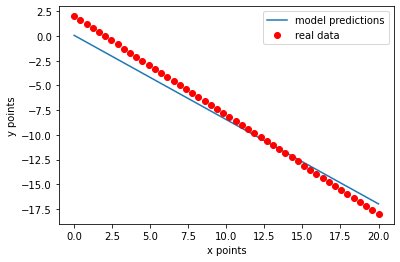

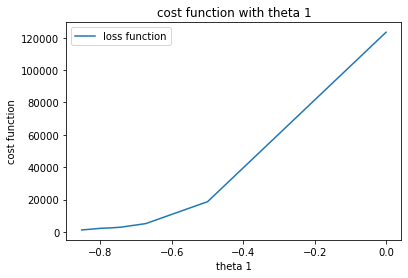

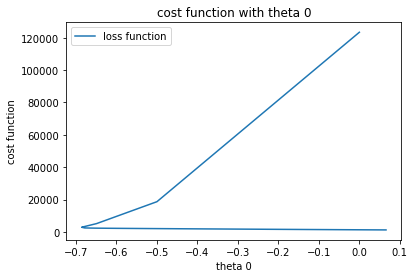

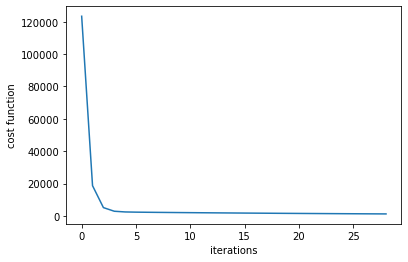

In [5]:
y_hat, theta0_list , theta1_list , cost_function_list,it = Adagrad_optimizer(x_points,y_points,learning_rate = 0.5)
# learning rate is big cuz we will divide by a large number
print(f'number of iterations is {it} ')
r2 = r2_score(y_points,y_hat)
print(f'r2 score is {r2}')
all_plots(x_points,y_hat, theta0_list , theta1_list , cost_function_list,it)

# RMS prop optimizer

In [6]:
def Rms_prop_optimizer(x_points,y_points,learning_rate = 0.01, theta0 =0, theta1 =0, beta = 0.3 ,iterations = 100):
    m = len(x_points)
    cost_function_list=[]
    theta0_list = []
    theta1_list = []
    v0 = 0 #vt which we will divide the learning rate on 
    v1 = 0
    
    for i in range(iterations):
        
        #...............................step 1: calculate y_hat and error vector...................................
        y_hat = theta1 * x_points + theta0
        error = y_hat - y_points
        
        #...............................step 2: clculate cost function...................................
        cost_function = (error.T.dot(error)) / (2*m) #J(theta0,theta1)
        
        #...............................step 3: clculate gradient of theta temp...................................
        gradient_theta0 = sum(error*1) / m #1d array containing 1 value as error is a m*1 vector
        gradient_theta1 = (error.T.dot(x_points)) / m #dot product always result in 2d array
        
        #...............................step 3.5: append thetas(before updating them) and cost function...................................
        theta0_list.append(theta0) 
        theta1_list.append(theta1) 
        cost_function_list.append(cost_function[0,0]) #cuz dot product produces 2d array
        
         #...............................step 4: clculate new_learning_rate...................................
        v0 = beta * v0 + (1-beta) * gradient_theta0[0] ** 2
        v1 = beta * v1 + (1-beta) * gradient_theta1[0,0] ** 2
        learning_rate_new0 = learning_rate / np.sqrt(v0)
        learning_rate_new1 = learning_rate / np.sqrt(v1)
        
        #...............................step 5: clculate theta new...................................
        theta0 = theta0 - learning_rate_new0 * gradient_theta0[0] # u can use theta0 = theta0 - m0
        theta1 = theta1 - learning_rate_new1 * gradient_theta1[0,0] # this a 2d array contains one list

        #.........................early stop condition.........................
        #u have 3 options 1.compare cost function(<0.001) or 2. compare thetas (norm of theta1 and theta2 vector) or/
        #/ 3. if gradient is really close to zero break and stop(<0.1) big number cuz it will be multiplied by alpha
        if len(cost_function_list) > 1:
            if abs(cost_function_list[-1] - cost_function_list[-2]) <0.010:
                break
            if gradient_theta0 < 0.1 and gradient_theta1 < 0.1:
                break
    return y_hat, theta0_list , theta1_list , cost_function_list,i

number of iterations is 17 
r2 score is 0.9851658558637642


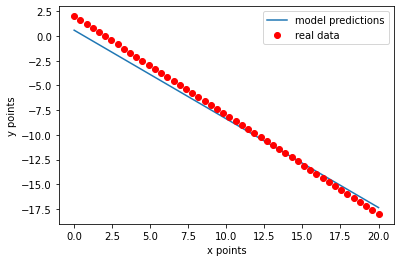

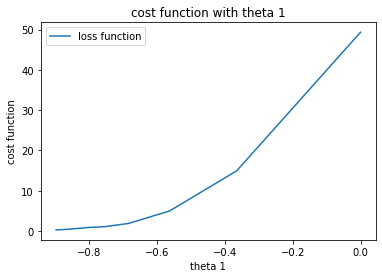

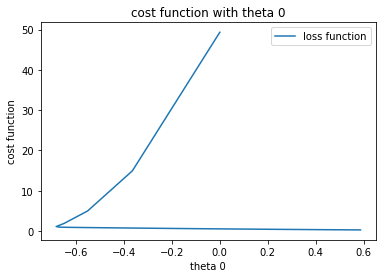

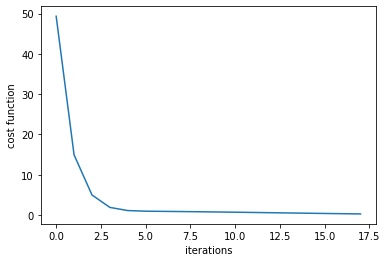

In [7]:
y_hat, theta0_list , theta1_list , cost_function_list,it = Rms_prop_optimizer(x_points,y_points,learning_rate = 0.2 , beta = 0.7)
evaluate_the_model(y_points = y_points , it = it , y_hat = y_hat)
all_plots(x_points,y_hat, theta0_list , theta1_list , cost_function_list,it)

### draft cell // to be deleted

In [8]:
x = np.array([[1,2,3],[2,3,4],[5,6,7]])
1/x

array([[1.        , 0.5       , 0.33333333],
       [0.5       , 0.33333333, 0.25      ],
       [0.2       , 0.16666667, 0.14285714]])

# Adam optimizer

In [9]:
def Adam_optimizer(x_points,y_points,learning_rate = 0.01, theta0 =0, theta1 =0, beta1 = 0.9 , beta2 = 0.99 ,iterations = 100):
    #..................................step 0 initializing the terms............................................
    m0 = 0
    v0 = 0
    m1 = 0
    v1 = 0
    cost_function_list = []
    theta0_list = []
    theta1_list = []
    m = len(x_points)
    epsilon = 10**-8
    for i in range(1,iterations) : 
        #...............................step 1 : calculate y_hat and error vector..................................
        y_hat = theta0 + theta1 * x_points
        error = y_hat - y_points
        
        #...............................step 2 : calculate cost function and gradient...............................
        cost_function = error.T.dot(error)/(2*m) #2d array contains one value
        
        #...............................step 3 : calculate the gradient ............................................
        gradient_theta0 = sum(error*1) / m
        gradient_theta1 = error.T.dot(x_points) / m
        
        #..............................step 4 : calculate the momentum and adaptive term............................
        m0 = beta1*m0 + (1-beta1) * gradient_theta0[0]
        m1 = beta1*m1 + (1-beta1) * gradient_theta1[0,0]
        
        v0 = beta2*v0 + (1-beta2) * gradient_theta0[0] **2
        v1 = beta2*v1 + (1-beta2) * gradient_theta1[0,0] **2
        
        #..............................step 5 : calculate the new m and v after bias correction........................
        m0_hat = m0/(1-beta1**i)
        m1_hat = m1/(1-beta1**i)
        
        v0_hat = v0/(1-beta2**i)
        v1_hat = v1/(1-beta2**i)
        
        # ............................step 5.5 : append the values of theta and cost function............................
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        cost_function_list.append(cost_function[0,0])
        
        #..............................step 6 : update the values of thetas..............................................
        theta0 = theta0 - ( learning_rate / (np.sqrt(v0_hat)+epsilon) ) * m0_hat
        theta1 = theta1 - ( learning_rate / (np.sqrt(v1_hat)+epsilon) ) * m1_hat
        
        #.............................early stop condition................................................................
        if len(cost_function_list) > 1:
            if abs(cost_function_list[-1] - cost_function_list[-2]) <0.01:
                break
            if gradient_theta0 < 0.1 and gradient_theta1 < 0.1:
                break
    return y_hat, theta0_list , theta1_list , cost_function_list,i        

number of iterations is 9 
r2 score is 0.9426077069280767


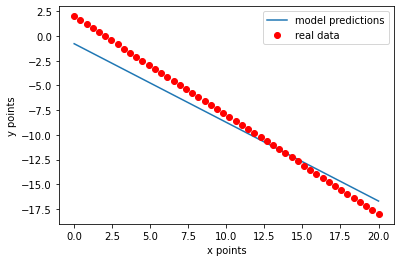

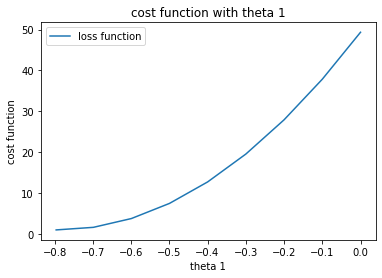

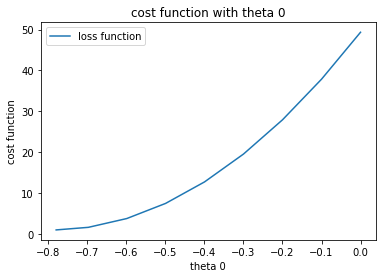

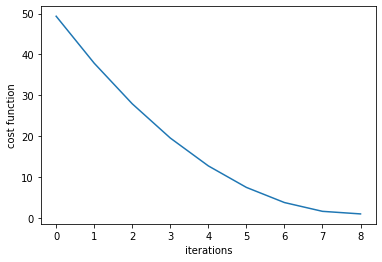

In [10]:
y_hat, theta0_list , theta1_list , cost_function_list,it = Adam_optimizer(x_points,y_points,learning_rate = 0.1 , beta1 = 0.05,beta2 = 0.05)
evaluate_the_model( y_points = y_points , it = it , y_hat = y_hat)
all_plots(x_points,y_hat, theta0_list , theta1_list , cost_function_list,it)